In [16]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')


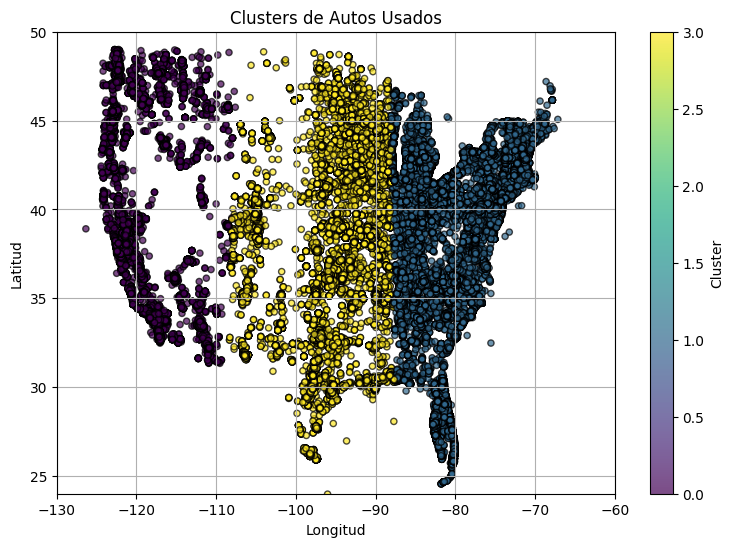

In [9]:
from sklearn.cluster import KMeans

# Extraer las coordenadas de latitud y longitud
coords = df[['lat', 'long']].values

# Definir el número de clusters
n_clusters = 4  # Puedes ajustar este valor según lo necesario

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords)

# Añadir los labels de los clusters al DataFrame
df['cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(9, 6))
plt.scatter(df['long'], df['lat'], c=df['cluster'], cmap='viridis', marker='o', s=20, alpha=0.7, edgecolor='k')
plt.title('Clusters de Autos Usados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim(-130, -60)
plt.ylim(24, 50)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Guardar los resultados en un nuevo archivo CSV
df.to_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//archivo_cluster_KMeans_4.csv', index=False)


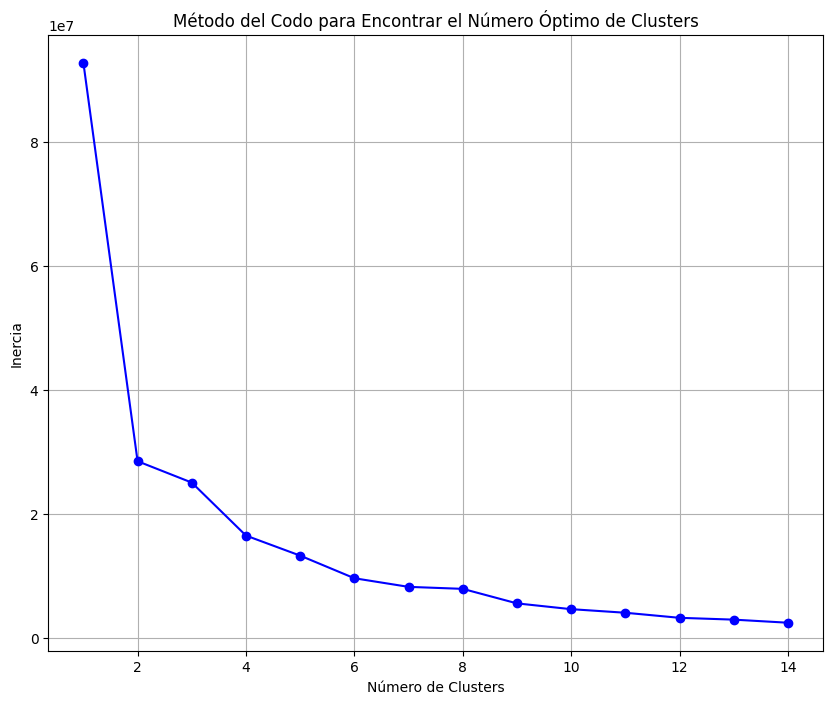

In [3]:
# Extraer las coordenadas de latitud y longitud
coords = df[['lat', 'long']].values

# Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(coords)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bo-')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [17]:
df1 = df[['lat', 'long', 'price']]

df1

lat        long  price
0       32.590000  -85.480000  22590
1       32.590000  -85.480000  30990
2       32.592000  -85.518900  15000
3       32.601300  -85.443974  35000
4       32.590000  -85.480000  29990
...           ...         ...    ...
251769  45.762900 -108.539000   5477
251770  33.786500  -84.445400  29590
251771  33.779214  -84.411811  32590
251772  33.779214  -84.411811  33590
251773  33.786500  -84.445400  23590

[251774 rows x 3 columns]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df1, test_size= 0.2, random_state= 42)

print (X_train.shape)

(201419, 3)


Text(0, 0.5, 'WCSS')

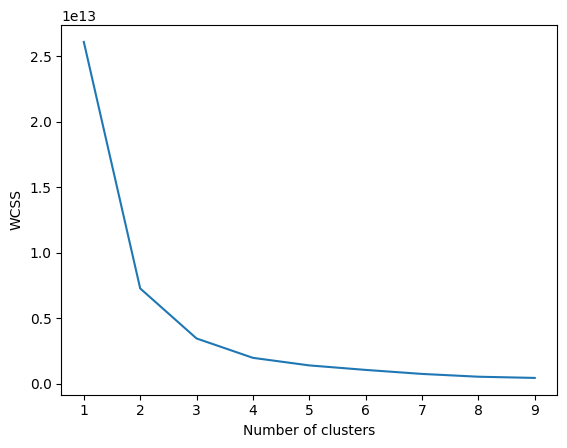

In [19]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

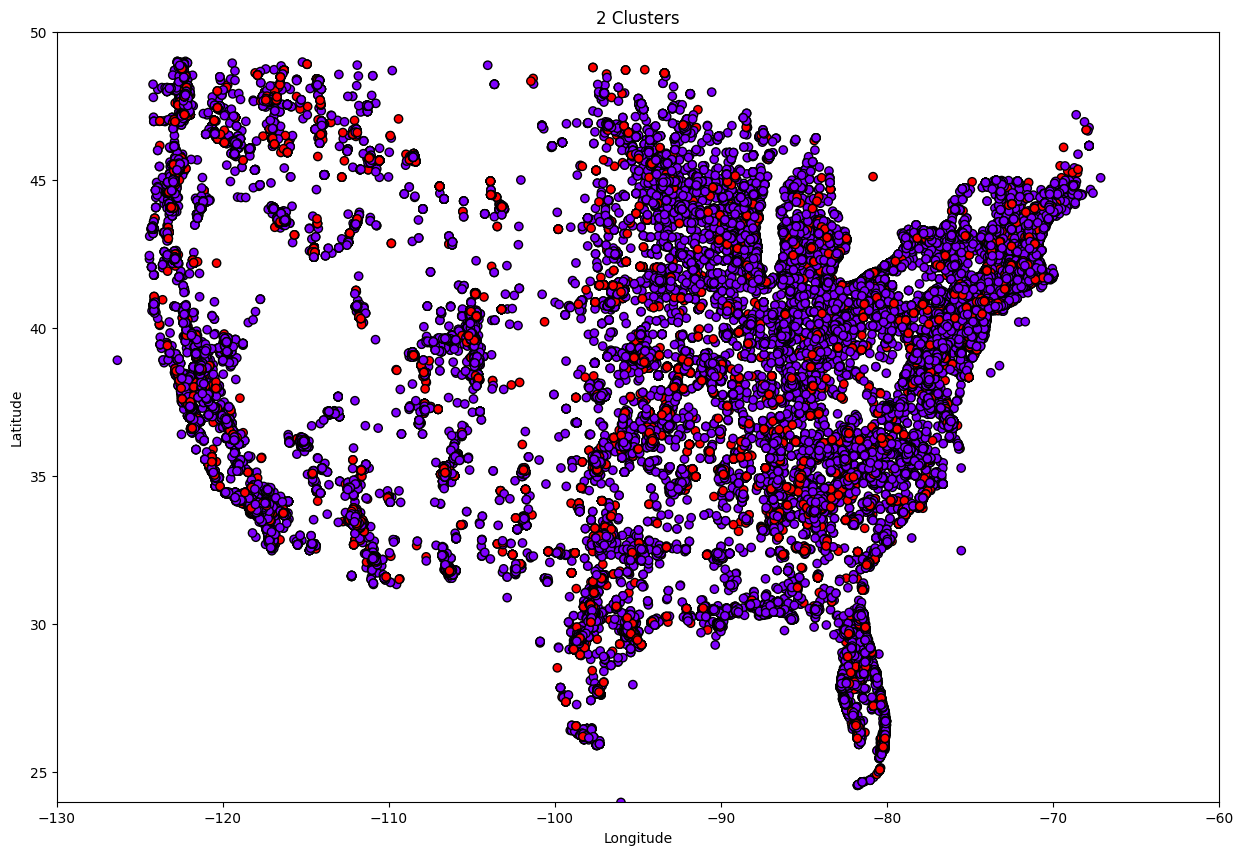

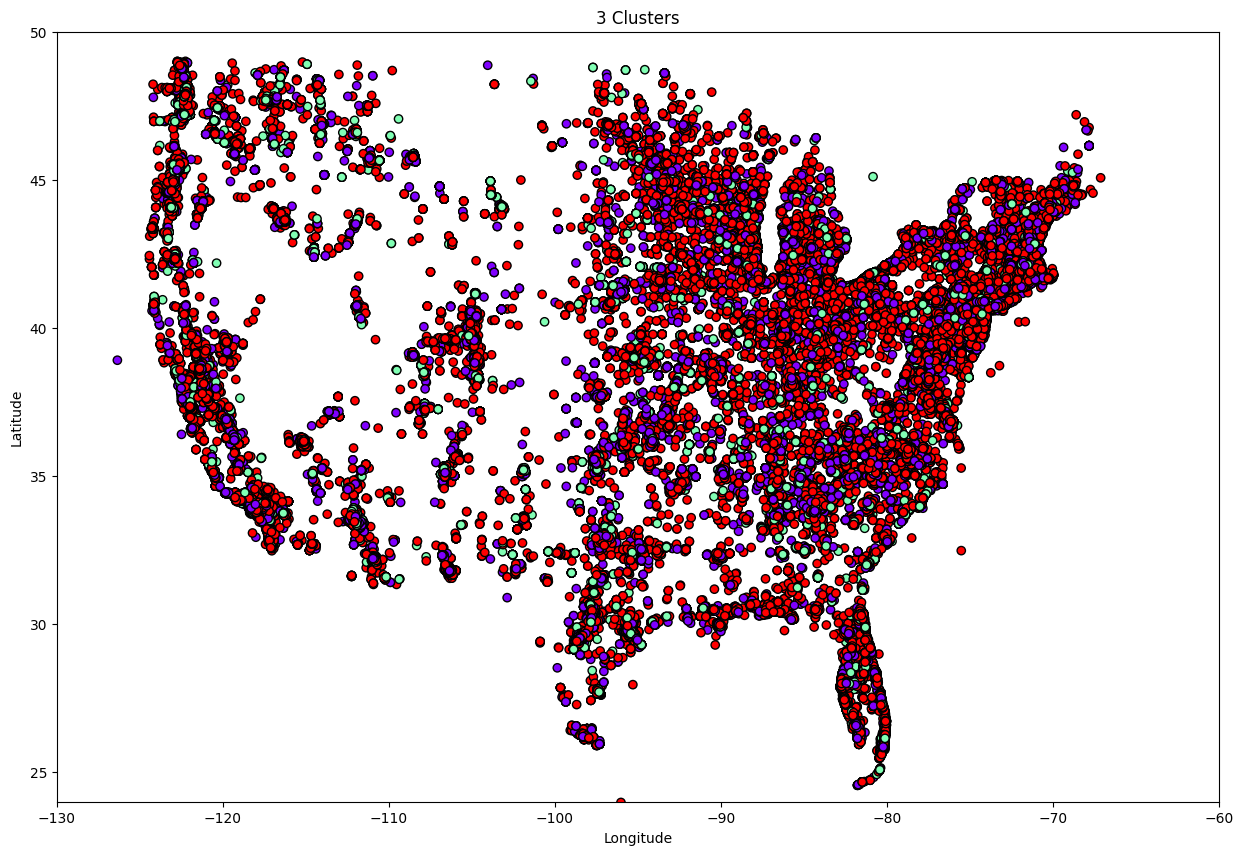

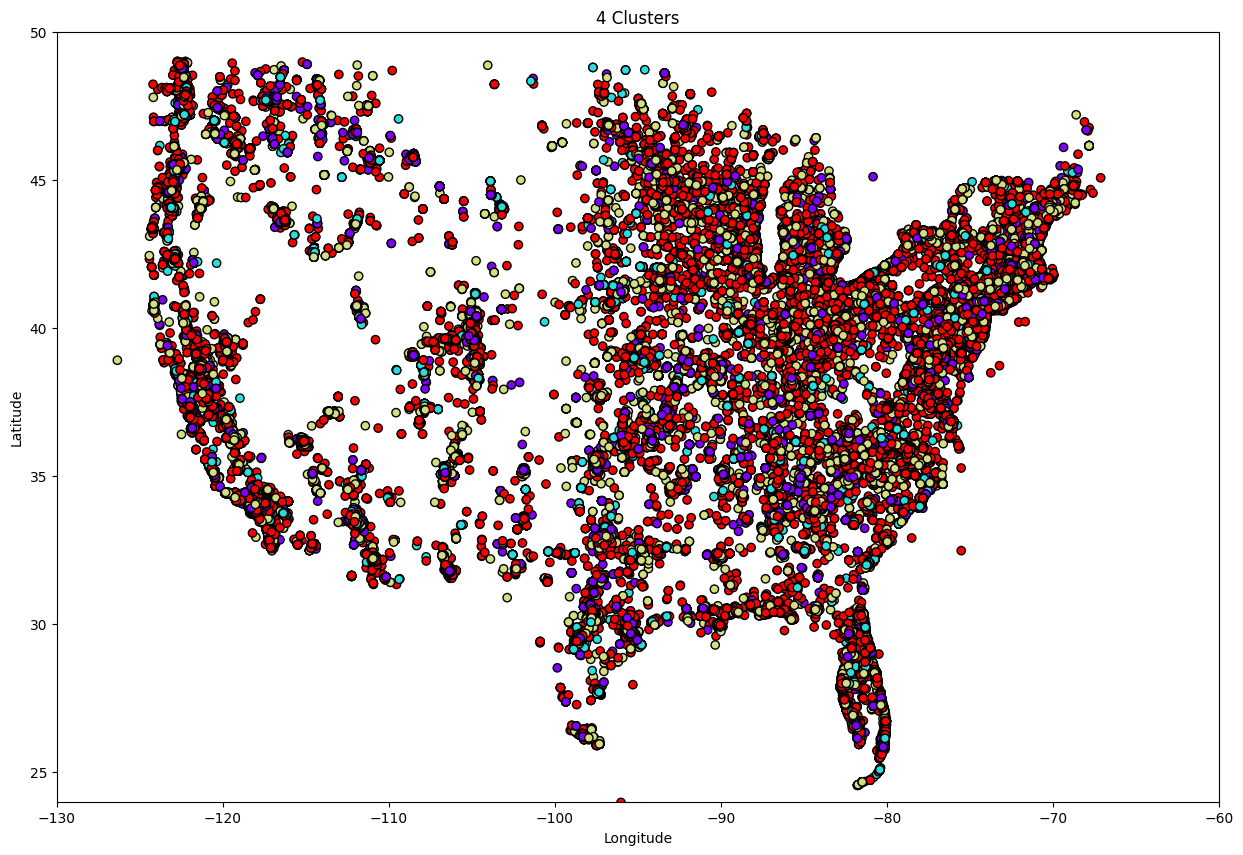

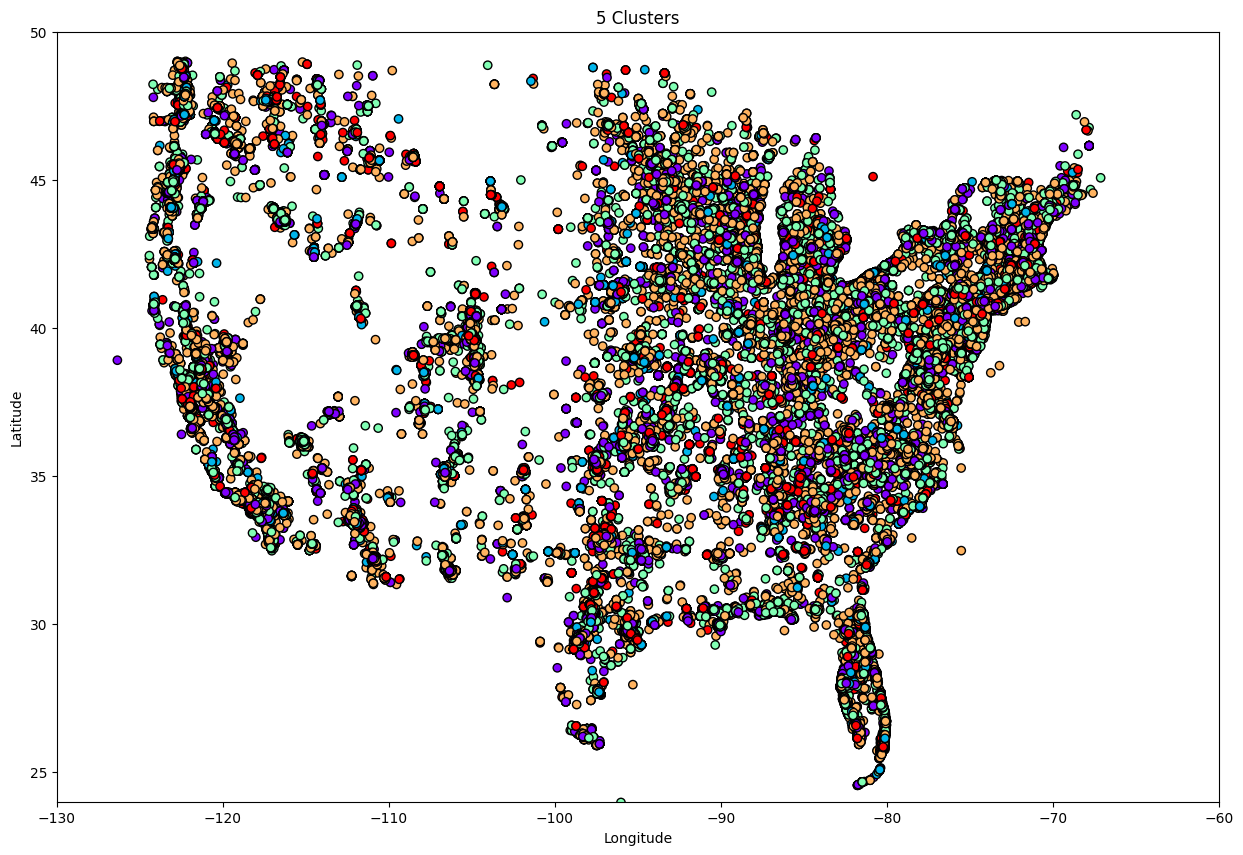

In [41]:
clusters = (2, 3, 4, 5)
models = {}

for c in clusters:
    models[c] = KMeans(n_clusters=c, random_state=42)
    X_train[f'cluster_{c}'] = models[c].fit_predict(X_train)
    
    # Plots
    fig, ax = plt.subplots(figsize=(15, 10))
    scatter = ax.scatter(X_train['long'], X_train['lat'], c=X_train[f'cluster_{c}'], cmap='rainbow', edgecolor='black')
    ax.set_xlim(-130, -60)
    ax.set_ylim(24, 50)
    ax.set_title(f'{c} Clusters')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    plt.show()




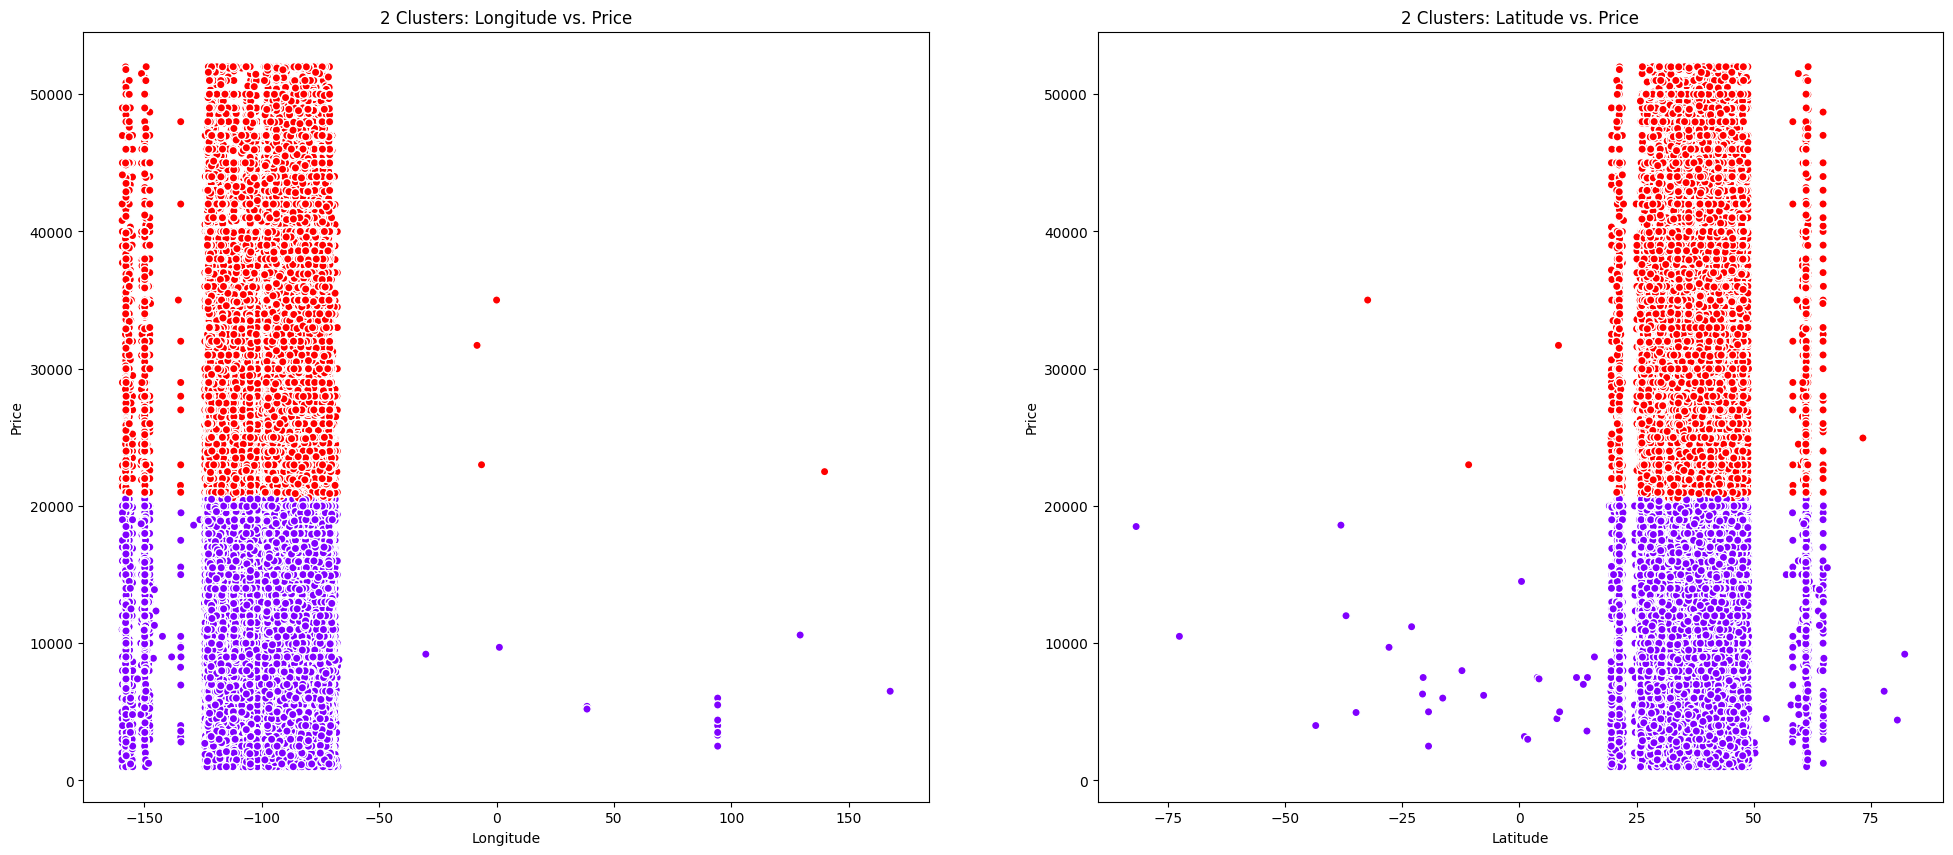

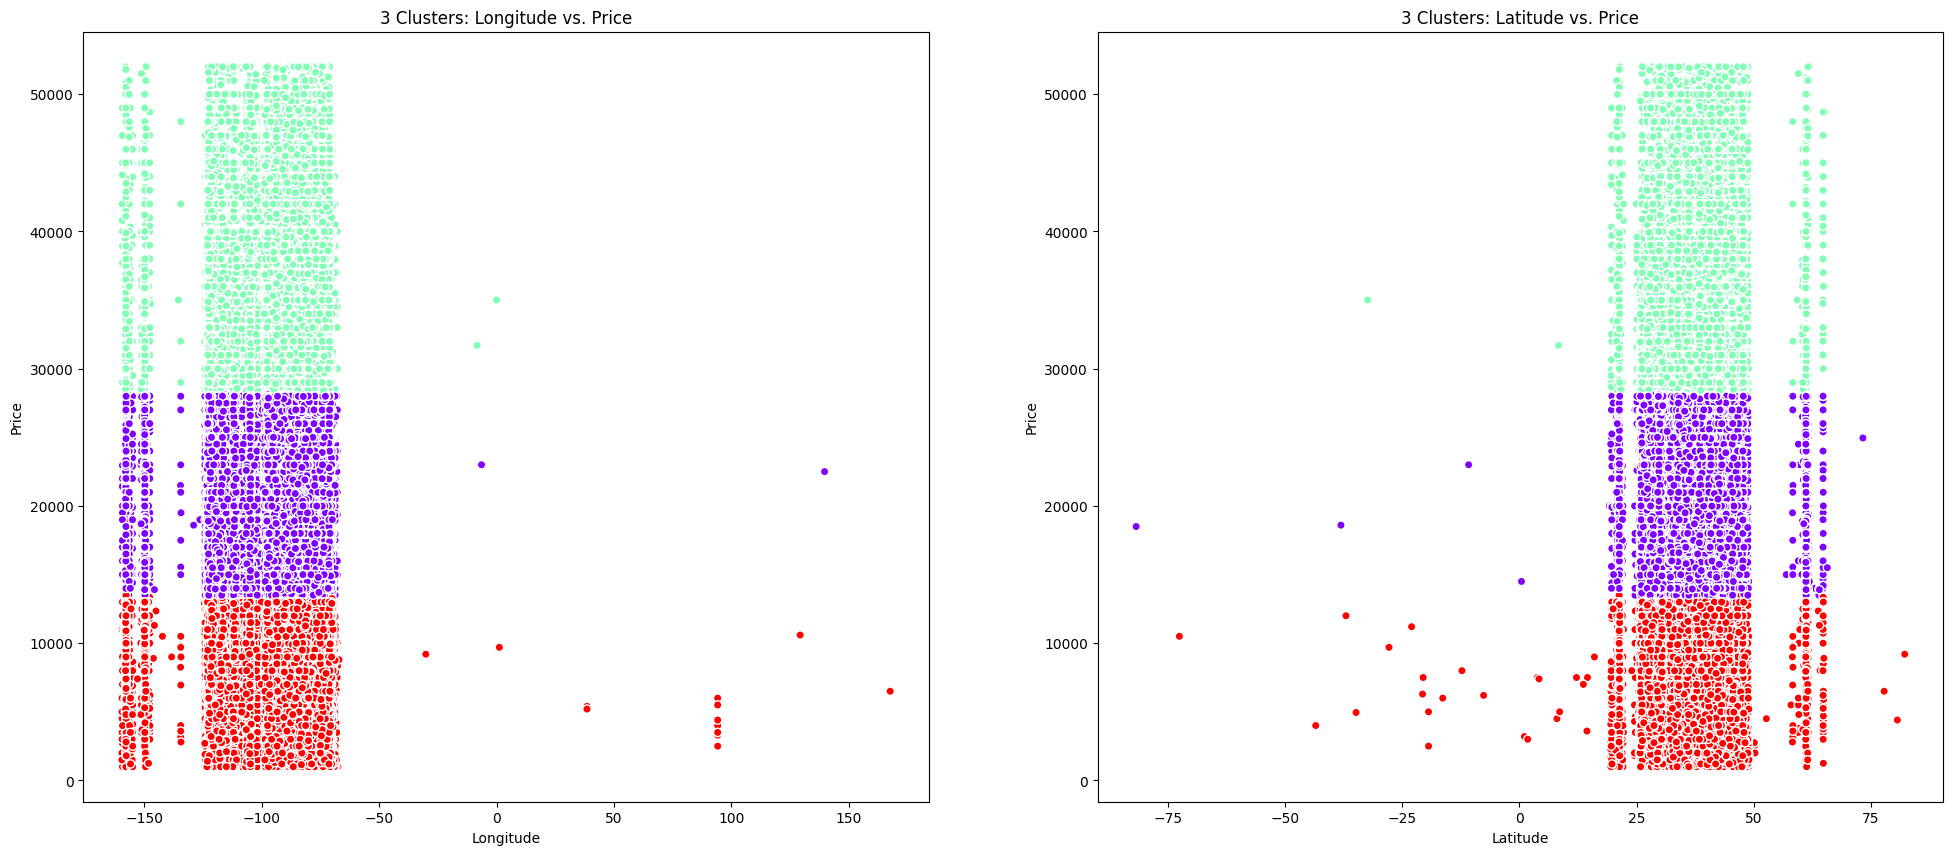

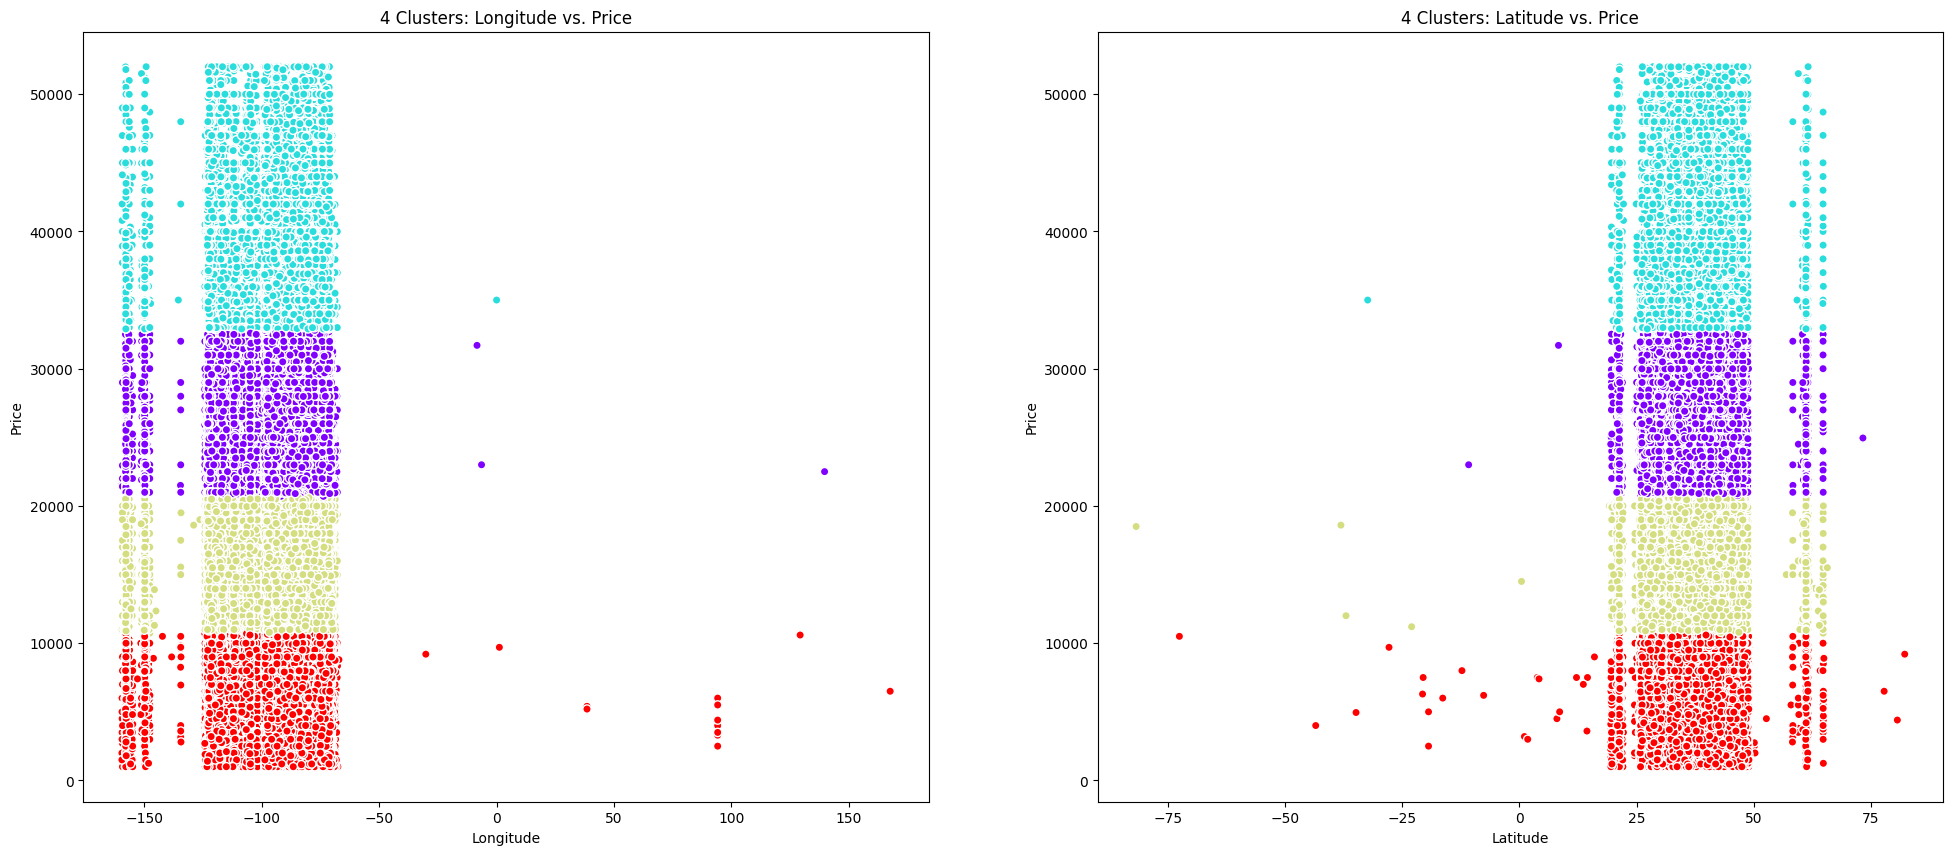

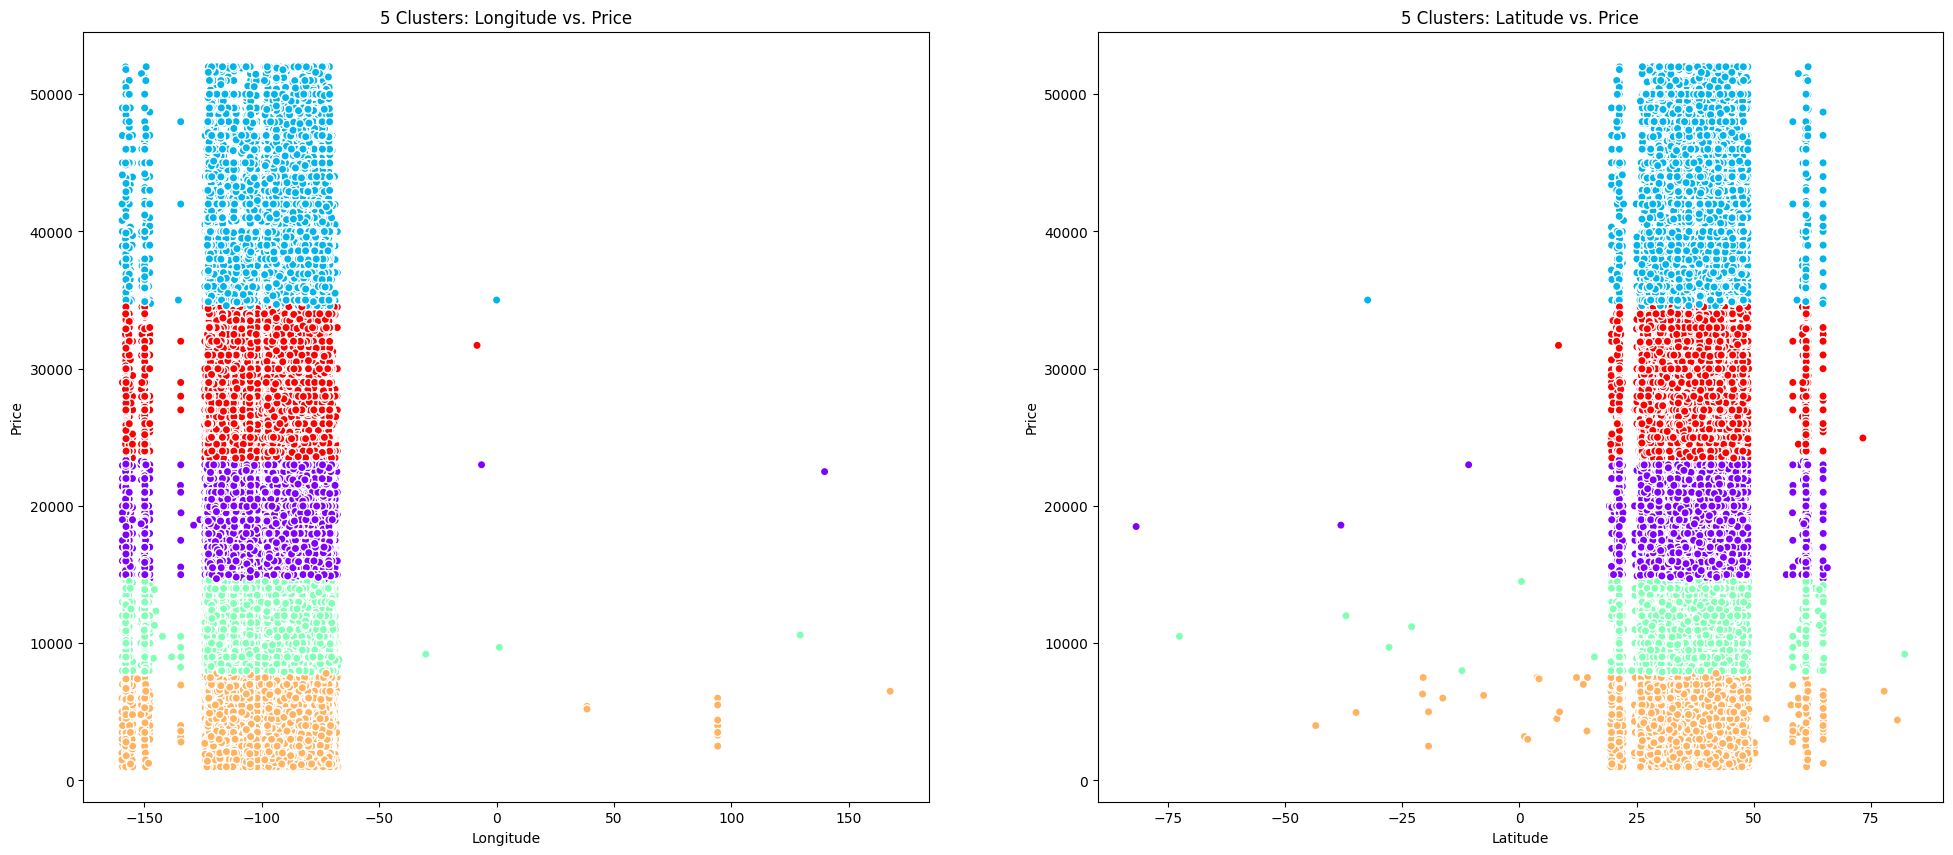

In [43]:
clusters = (2, 3, 4, 5)
models = {}

for c in clusters:

# Create subplots
    fig, axis = plt.subplots(1, 2, figsize=(24, 10))
    
    # Scatter plot for longitude vs. price
    scatter1 = axis[0].scatter(X_train['long'], X_train['price'], c=X_train[f'cluster_{c}'], cmap='rainbow', edgecolor='white')
    axis[0].set_title(f'{c} Clusters: Longitude vs. Price')
    axis[0].set_xlabel('Longitude')
    axis[0].set_ylabel('Price')
    
    # Scatter plot for latitude vs. price
    scatter2 = axis[1].scatter(X_train['lat'], X_train['price'], c=X_train[f'cluster_{c}'], cmap='rainbow', edgecolor='white')
    axis[1].set_title(f'{c} Clusters: Latitude vs. Price')
    axis[1].set_xlabel('Latitude')
    axis[1].set_ylabel('Price')
    
    plt.show()

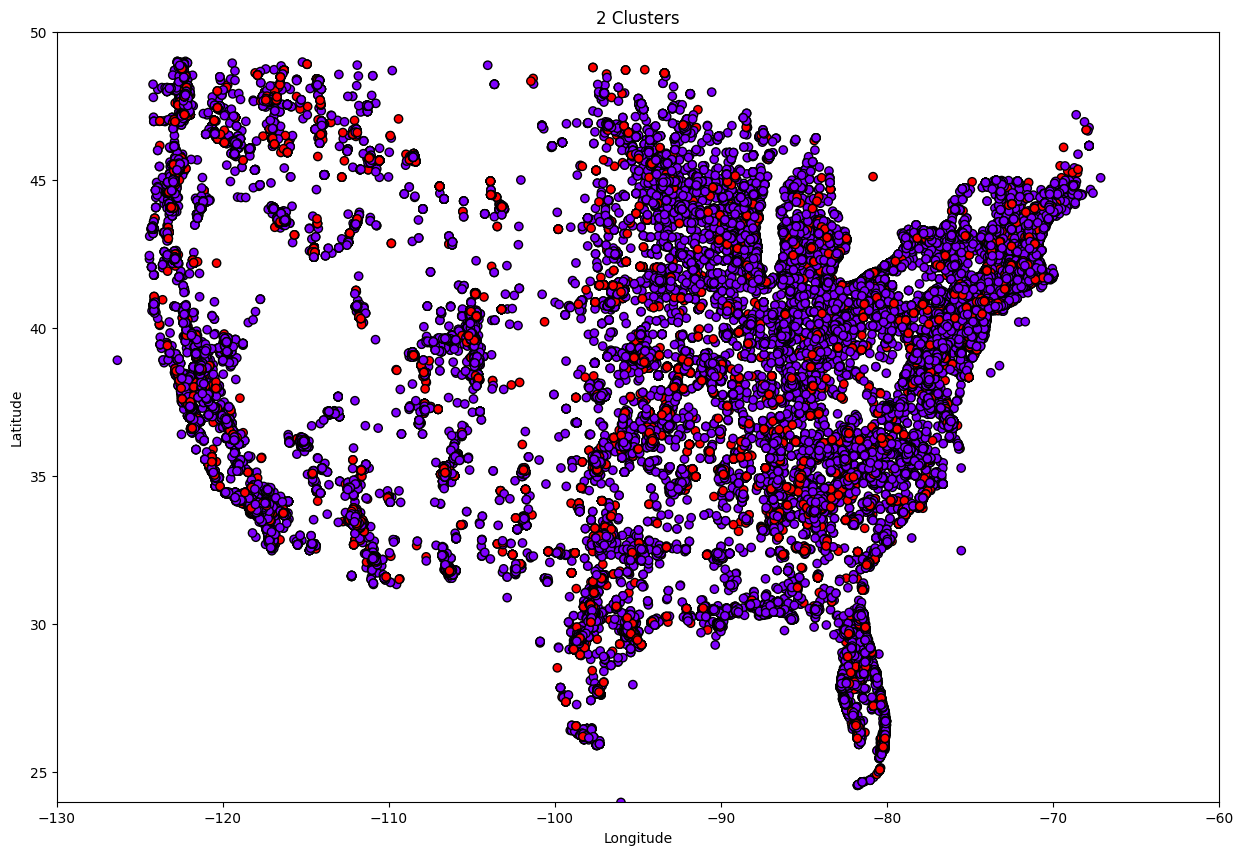

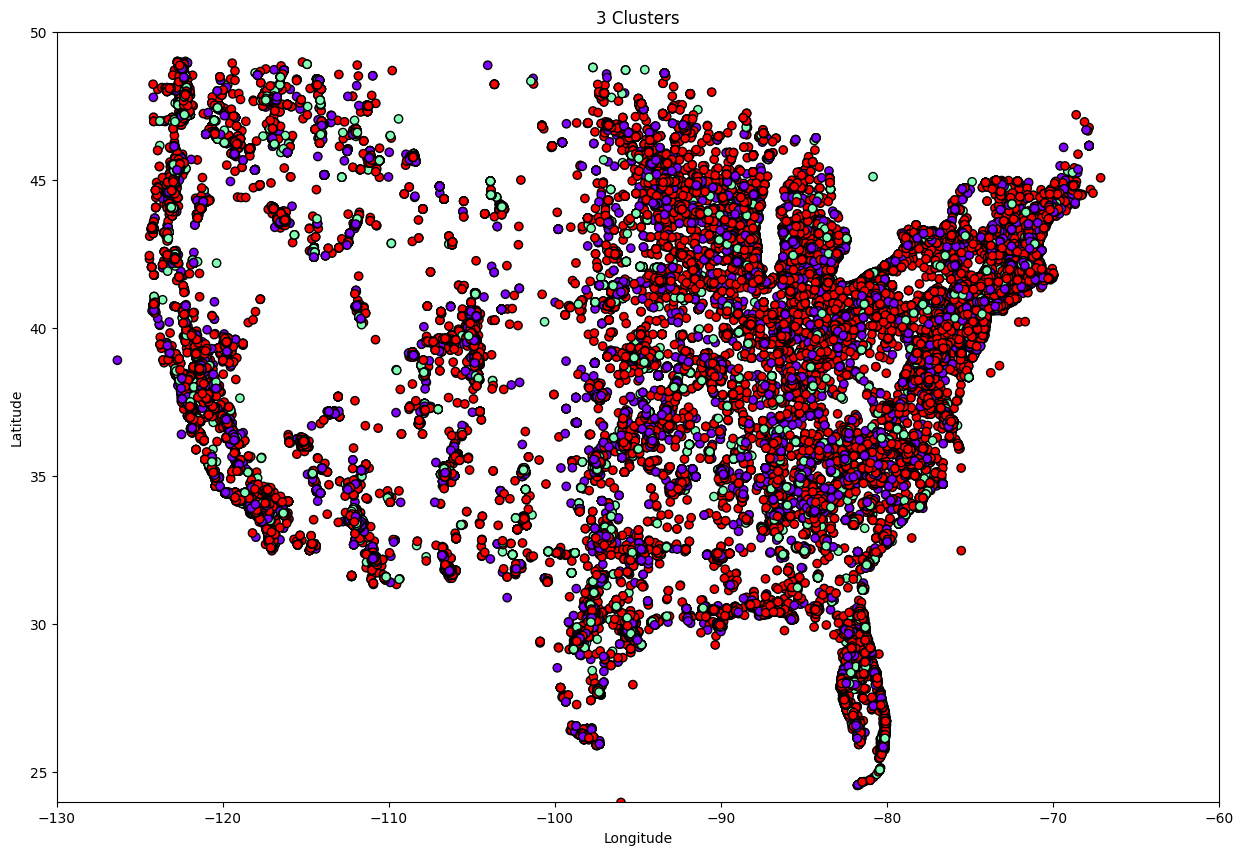

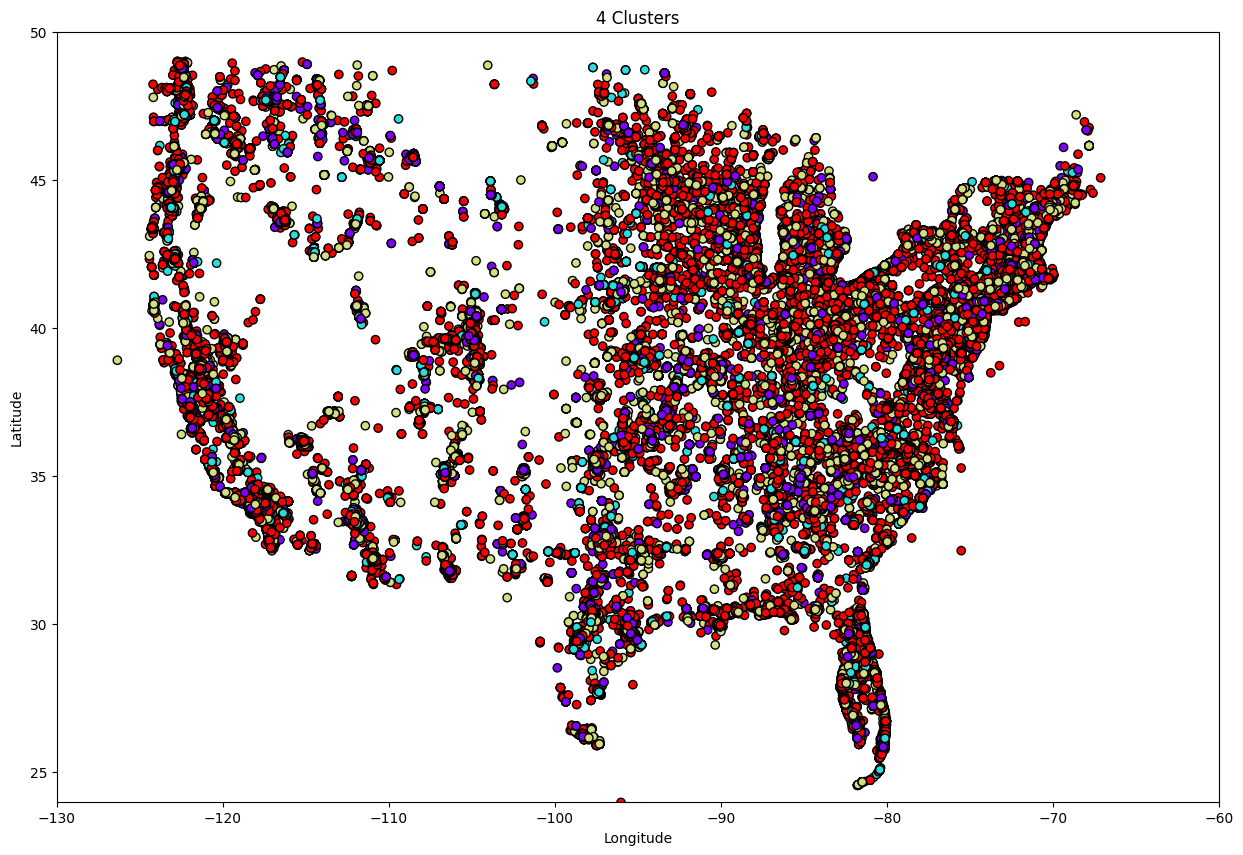

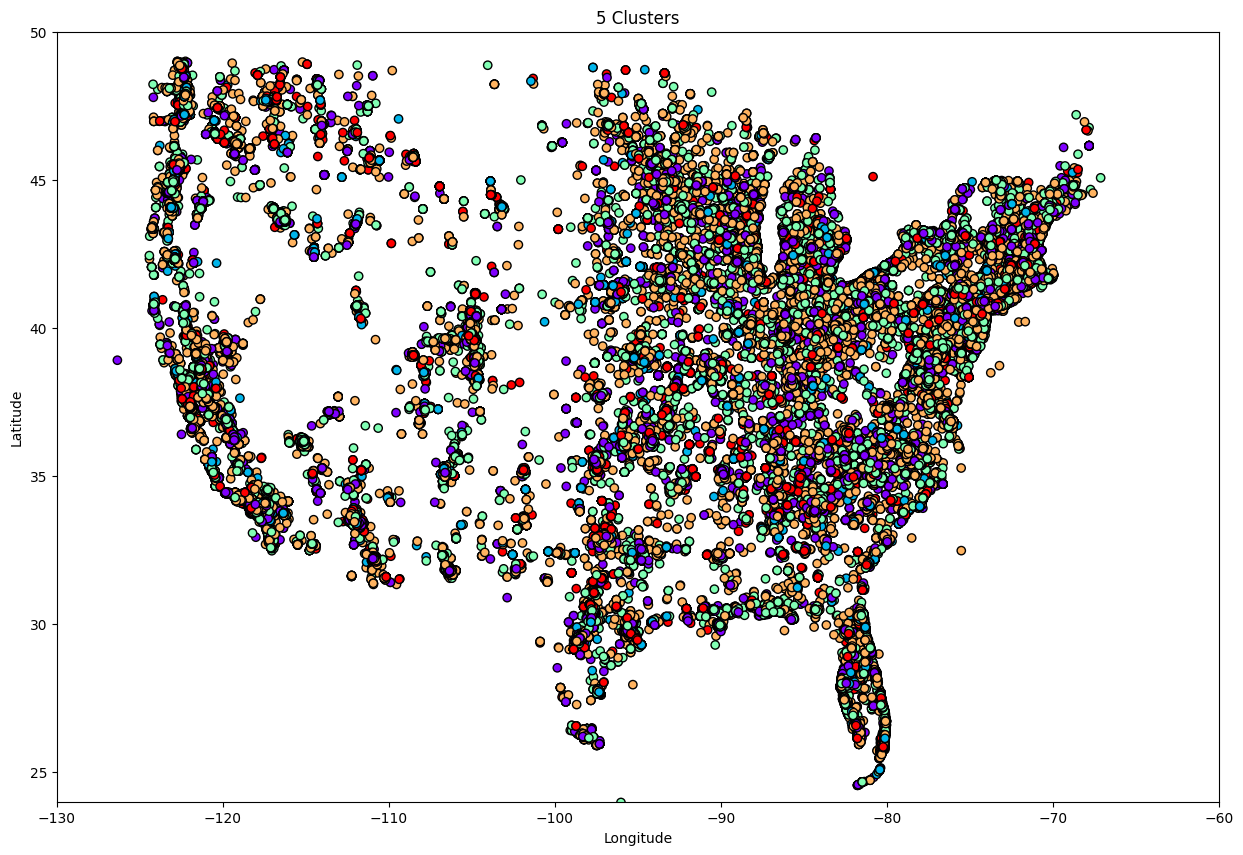

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant columns
df2 = df[['lat', 'long', 'manufacturer', 'price']]

# Split the DataFrame into training and testing sets
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=42)

# One-hot encode the 'manufacturer' column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['manufacturer'])
    ],
    remainder='passthrough'  # Keep the remaining columns as is
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Initialize dictionary to store KMeans models
clusters = (2, 3, 4, 5)
models = {}

for c in clusters:
    # Fit the model
    models[c] = KMeans(n_clusters=c, random_state=42)
    X_train[f'cluster_{c}'] = models[c].fit_predict(X_train_processed)
    
    # Plot the results
    fig, ax = plt.subplots(figsize=(15, 10))
    scatter = ax.scatter(X_train['long'], X_train['lat'], c=X_train[f'cluster_{c}'], cmap='rainbow', edgecolor='black')
    ax.set_xlim(-130, -60)
    ax.set_ylim(24, 50)
    ax.set_title(f'{c} Clusters')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    plt.show()



In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Assuming df is your original DataFrame
df2 = df[['lat', 'long', 'manufacturer', 'price']]

# Split the DataFrame into training and testing sets
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=42)

# One-hot encode the 'manufacturer' column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['manufacturer'])
    ],
    remainder='passthrough'  # Keep the remaining columns as is
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Fit the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
X_train['cluster_5'] = kmeans.fit_predict(X_train_processed)

# Add the cluster assignments to the original DataFrame
df['cluster'] = kmeans.predict(preprocessor.transform(df2))

# Save the DataFrame to a CSV file
df.to_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//archivo_cluster_KMeans_5.csv', index=False)

print("DataFrame with clusters saved to 'df_con_5_clusters_llmp.csv'.")


DataFrame with clusters saved to 'df_con_5_clusters_llmp.csv'.
